In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.integrate import solve_ivp

# **Problem 1** #

## a) ##

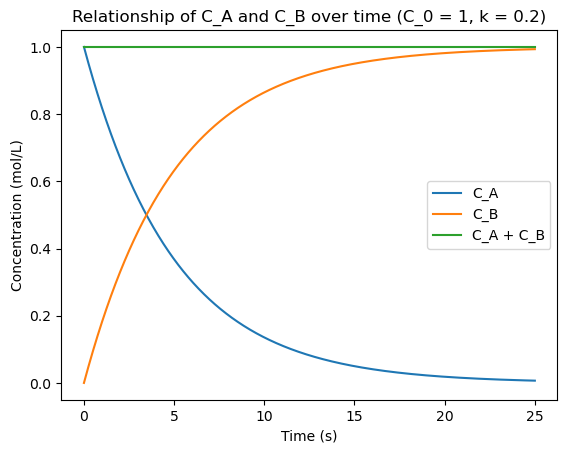

In [ ]:
def C_A(t, C_0, k):
    return C_0 * np.exp(-k * t)

def C_B(t, C_0, k):
    return C_0 * (1 - np.exp(-k * t))

t_arr = np.linspace(0, 25, 1000)
k = 0.2
C_0 = 1

plt.plot(t_arr, C_A(t_arr, C_0, k), label='C_A')
plt.plot(t_arr, C_B(t_arr, C_0, k), label='C_B')
plt.plot(t_arr, C_A(t_arr, C_0, k) + C_B(t_arr, C_0, k), label='C_A + C_B')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('Evolution of C_A and C_B over time (C_0 = 1, k = 0.2)')
plt.legend()
plt.show()


## b) ##

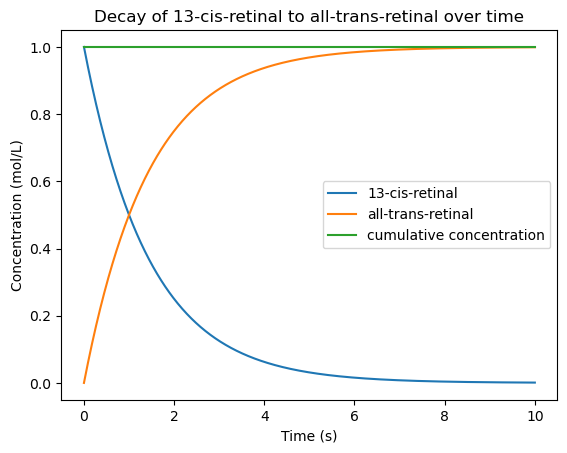

In [18]:
def C_A(t, N_0, tau):
    k = np.log(2) / tau
    return N_0 * np.exp(-k * t)


def C_B(t, N_0, tau):
    k = np.log(2) / tau
    return N_0 * (1 - np.exp(-k * t))


t_arr = np.linspace(0, 10, 1000)
tau = 1             # in s
C_0 = 1             # in M

plt.plot(t_arr, C_A(t_arr, C_0, tau), label='13-cis-retinal')
plt.plot(t_arr, C_B(t_arr, C_0, tau), label='all-trans-retinal')
plt.plot(t_arr, C_A(t_arr, C_0, tau) + C_B(t_arr, C_0, tau), label='cumulative concentration')
plt.xlabel('Time (s)')
plt.ylabel('Concentration (mol/L)')
plt.title('Decay of 13-cis-retinal to all-trans-retinal over time')
plt.legend()
plt.show()

## c) ##

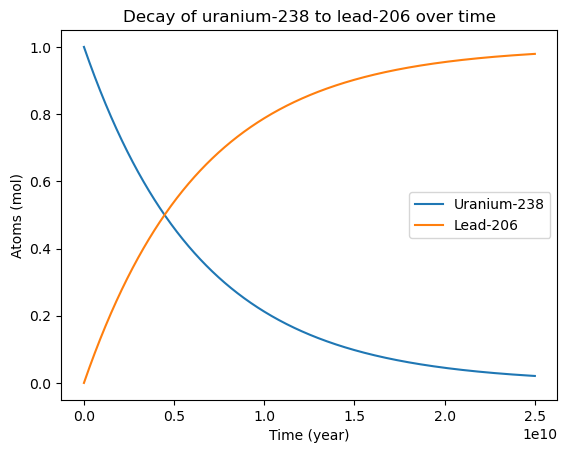

In [15]:
def uranium(t, N_0, tau):
    k = np.log(2) / tau
    return N_0 * np.exp(-k * t)


def lead(t, N_0, tau):
    k = np.log(2) / tau
    return N_0 * (1 - np.exp(-k * t))


t_arr = np.linspace(0, 25E9, 1000)
tau = 4.47E9        # in years
N_0 = 1             # in mol

plt.plot(t_arr, uranium(t_arr, N_0, tau), label='Uranium-238')
plt.plot(t_arr, lead(t_arr, N_0, tau), label='Lead-206')
plt.xlabel('Time (year)')
plt.ylabel('Atoms (mol)')
plt.title('Decay of uranium-238 to lead-206 over time')
plt.legend()
plt.show()

# **Problem 2** #

## a) ##

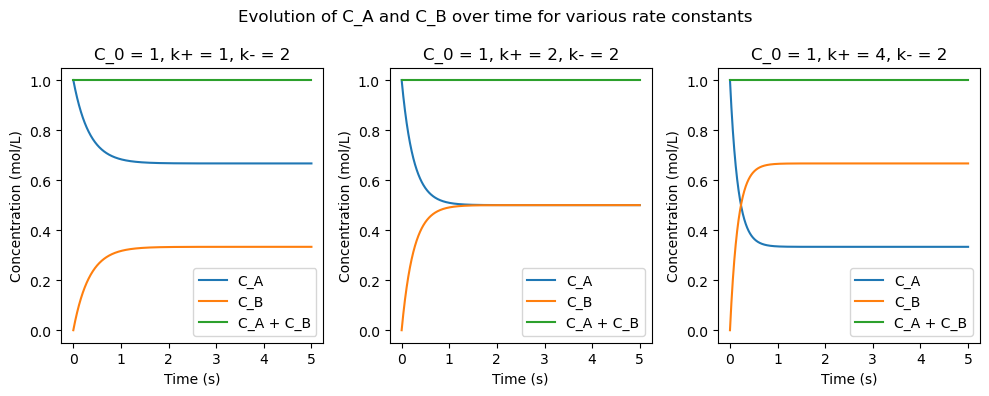

In [35]:
def C_A(t, C_0, k_p, k_m):
    return C_0 * (k_p / (k_p + k_m) * np.exp(-(k_p + k_m) * t) + k_m / (k_p + k_m))


def C_B(t, C_0, k_p, k_m):
    return C_0 * k_p / (k_p + k_m) * (1 - np.exp(-(k_p + k_m) * t))

C_0 = 1
t_arr = np.linspace(0, 5, 1000)

k_p_vals = [1, 2, 4]
k_m = 2

fig, ax = plt.subplots(1, 3, figsize=(10,4), tight_layout=True)
for i, k_p in enumerate(k_p_vals):
    ax[i].plot(t_arr, C_A(t_arr, C_0, k_p, k_m), label='C_A')
    ax[i].plot(t_arr, C_B(t_arr, C_0, k_p, k_m), label='C_B')
    ax[i].plot(t_arr, C_A(t_arr, C_0, k_p, k_m) + C_B(t_arr, C_0, k_p, k_m), label='C_A + C_B')
    ax[i].set_ylabel('Concentration (mol/L)')
    ax[i].set_xlabel('Time (s)')
    ax[i].set_title('C_0 = 1, k+ = {}, k- = {}'.format(k_p, k_m))
    ax[i].legend()
fig.suptitle("Evolution of C_A and C_B over time for various rate constants")
plt.show()

## b) ##

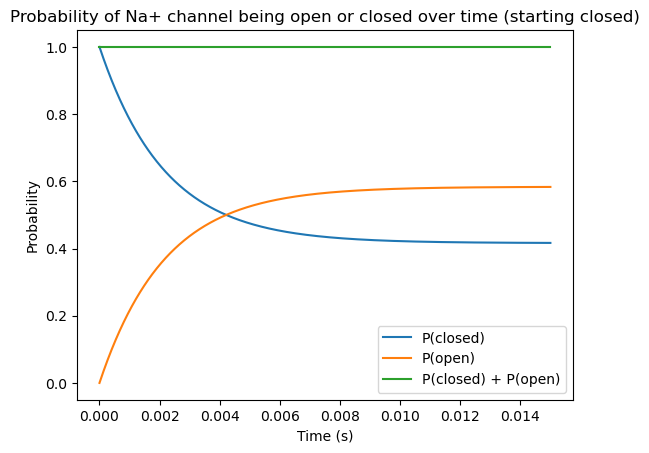

In [45]:
def P_closed(t, k_p, k_m):
    return k_p / (k_p + k_m) * np.exp(-(k_p + k_m) * t) + k_m / (k_p + k_m)

def P_open(t, k_p, k_m):
    return k_p / (k_p + k_m) * (1 - np.exp(-(k_p + k_m) * t))

t_arr = np.linspace(0, 1.5E-2, 1000)
k_p = 268.7
k_m = 191.5

plt.plot(t_arr, P_closed(t_arr, k_p, k_m), label='P(closed)')
plt.plot(t_arr, P_open(t_arr, k_p, k_m), label='P(open)')
plt.plot(t_arr, P_open(t_arr, k_p, k_m) + P_closed(t_arr, k_p, k_m), label='P(closed) + P(open)')
plt.xlabel('Time (s)')
plt.ylabel('Probability')
plt.title('Probability of Na+ channel being open or closed over time (starting closed)')
plt.legend()
plt.show()


## c) ##

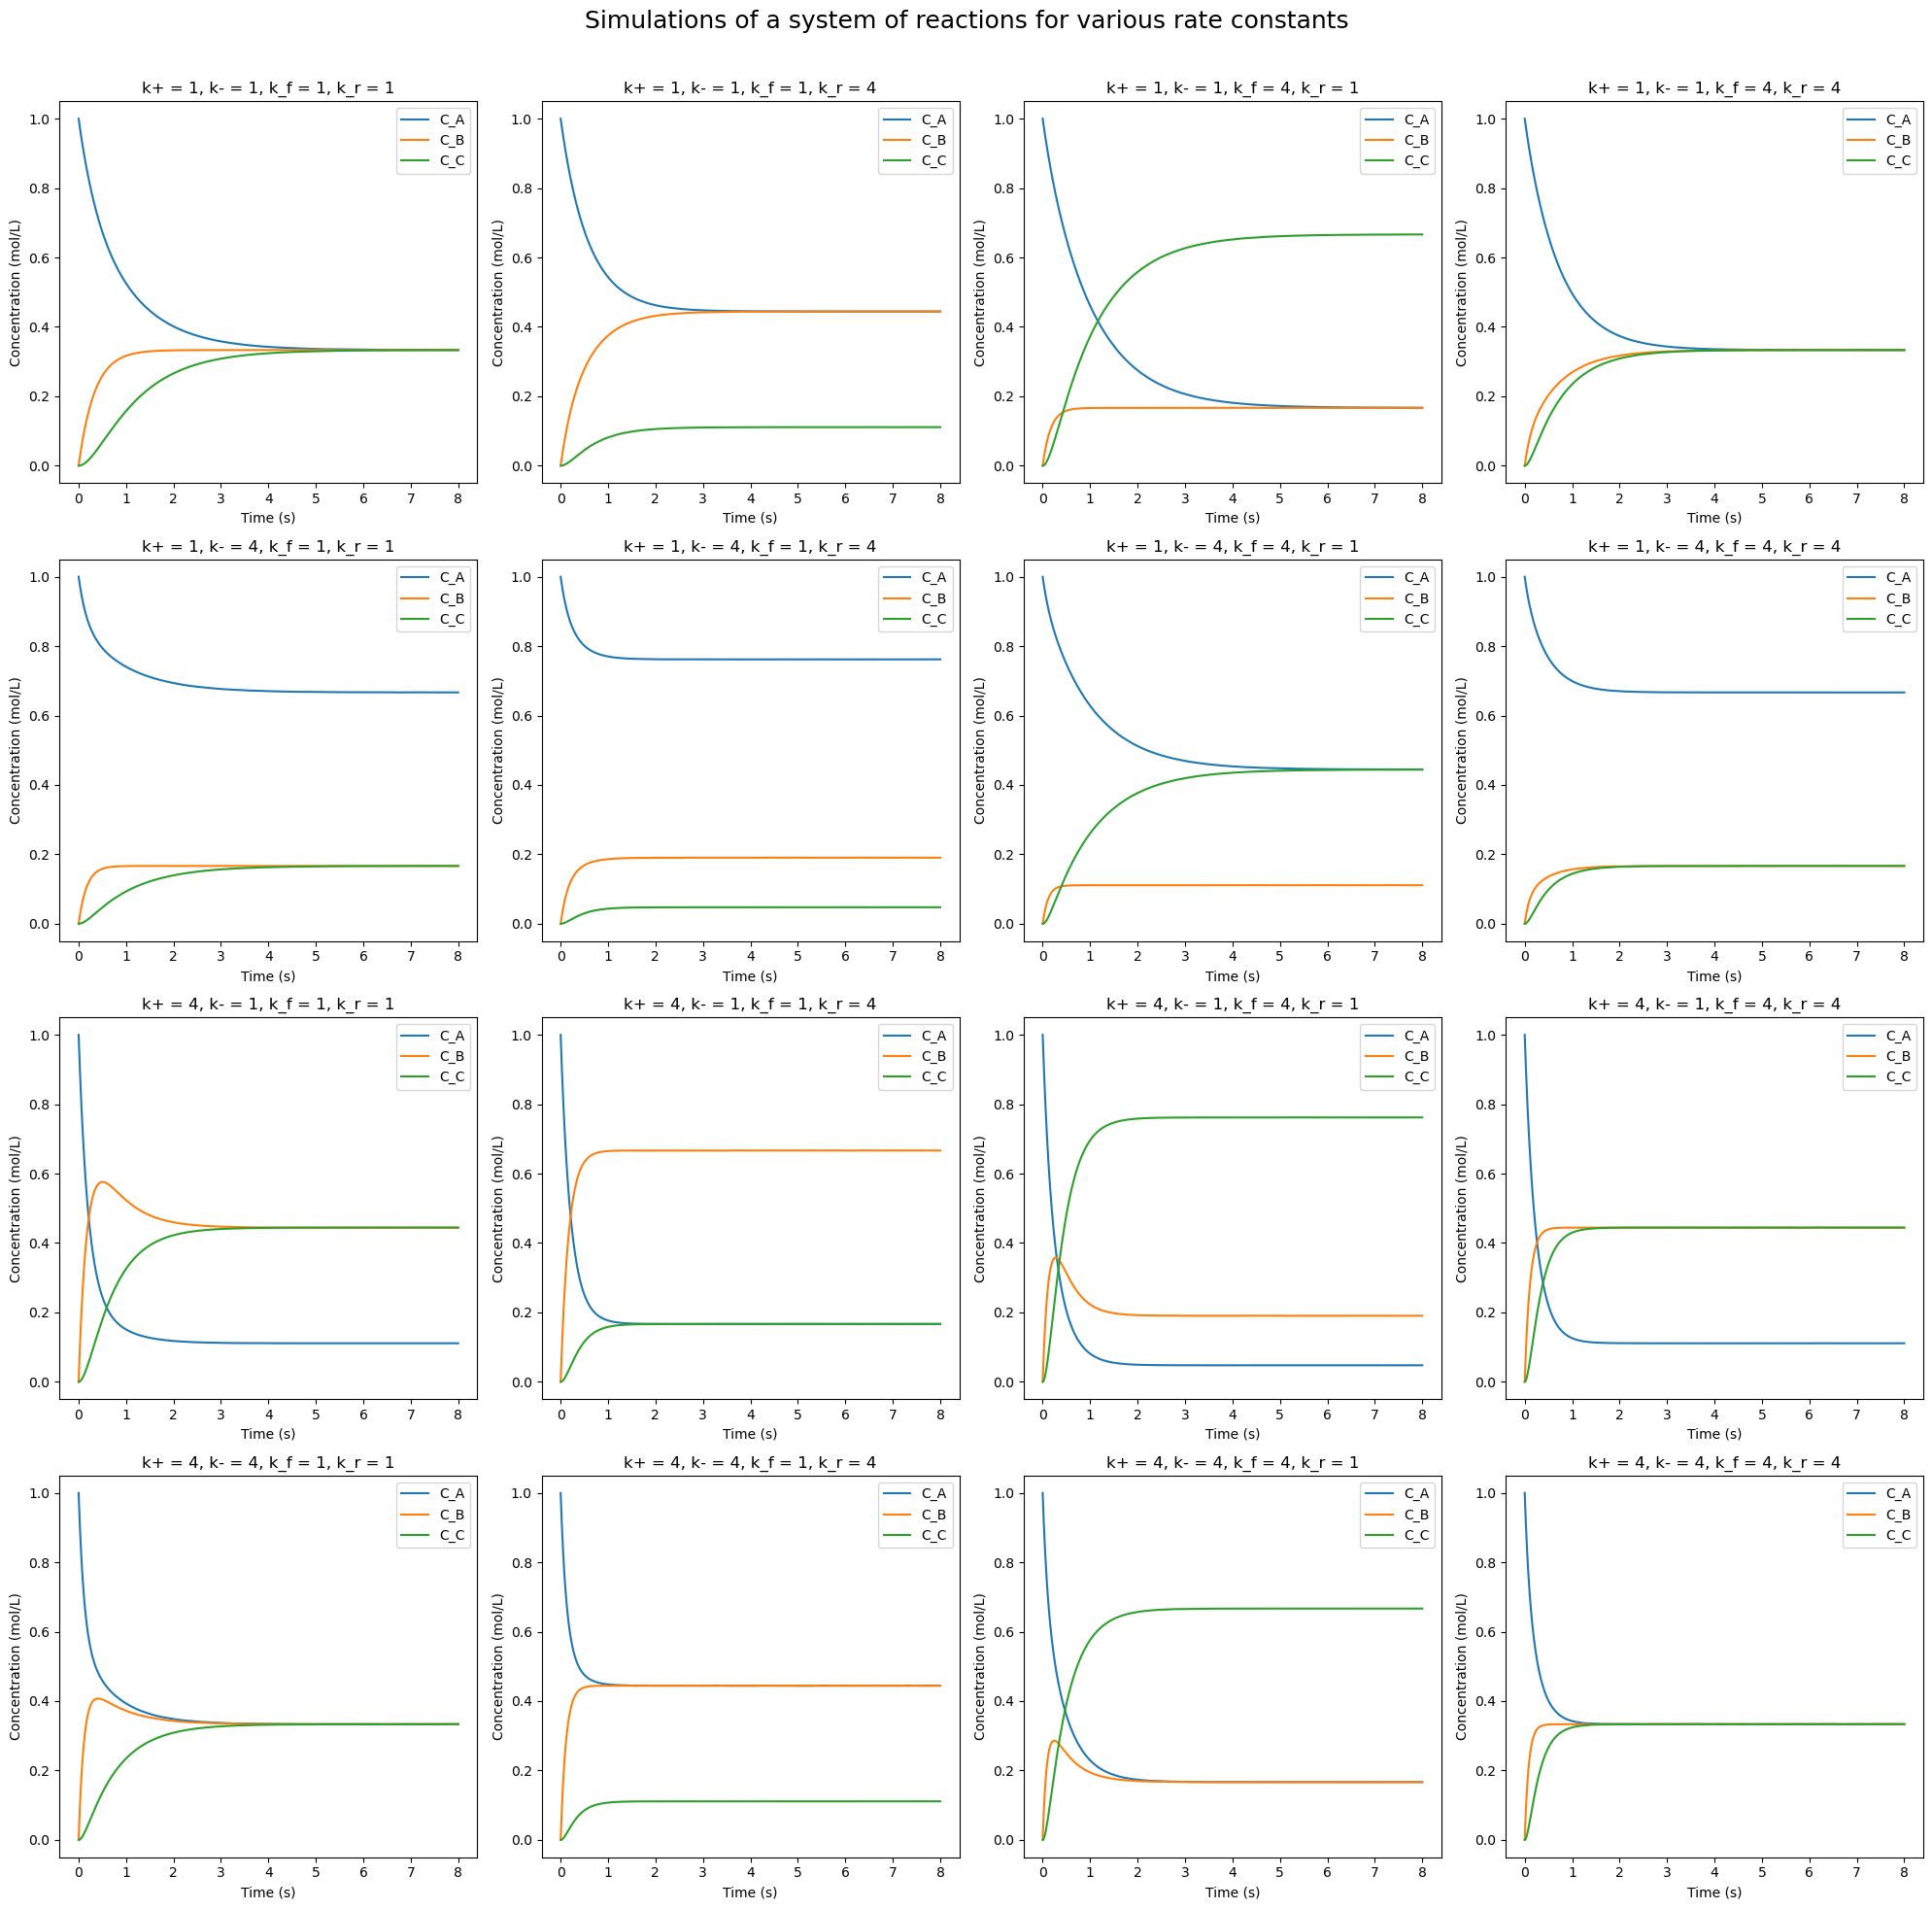

In [94]:
# Define the system of ODEs
def reaction_system(t, y, k_p, k_m, k_f, k_r):
    C_A, C_B, C_C = y
    dC_A_dt = -k_p * C_A + k_m * C_B
    dC_B_dt = k_p * C_A - (k_m + k_f) * C_B + k_r * C_C
    dC_C_dt = k_f * C_B - k_r * C_C
    return [dC_A_dt, dC_B_dt, dC_C_dt]

# Define the rate constant combinations
# This generates all combinations of k_p, k_m, k_f, k_r with values 1 and 4.
k_vals = list(product([1, 4], repeat=4))

# Simulation time parameters
t_max = 8
# Generate an array of time points for evaluation
dt = 0.005
t_eval = np.linspace(0, t_max, int(t_max / dt))

# Initial concentrations
C_A_0 = 1
C_B_0 = 0
C_C_0 = 0
y0 = [C_A_0, C_B_0, C_C_0]

# Prepare a 4x4 subplot grid (since there are 16 combinations)
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Loop over each set of rate constants
for i, (k_p, k_m, k_f, k_r) in enumerate(k_vals):
    # Solve the ODE system using RK45
    sol = solve_ivp(
        fun=reaction_system,
        t_span=(0, t_max),
        y0=y0,
        t_eval=t_eval,
        args=(k_p, k_m, k_f, k_r),
        method='RK45'
    )
    
    # Extract the solution for each species
    t_arr = sol.t
    C_A_arr, C_B_arr, C_C_arr = sol.y

    # Determine subplot location (i // 4 gives row, i % 4 gives column)
    row, col = i // 4, i % 4
    ax[row, col].plot(t_arr, C_A_arr, label='C_A')
    ax[row, col].plot(t_arr, C_B_arr, label='C_B')
    ax[row, col].plot(t_arr, C_C_arr, label='C_C')
    ax[row, col].set_ylabel('Concentration (mol/L)')
    ax[row, col].set_xlabel('Time (s)')
    ax[row, col].set_title(f'k+ = {k_p}, k- = {k_m}, k_f = {k_f}, k_r = {k_r}')
    ax[row, col].legend()

# Adjust layout and add an overall title
fig.suptitle('Simulations of a system of reactions for various rate constants', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# **Problem 3** #

## a) ##

Equilibrium is reached after approximately 136 time steps


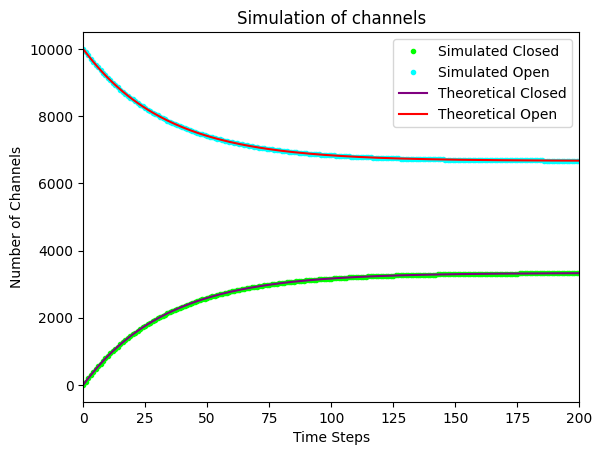

In [ ]:
# theoretical function for number of open channels assuming they all start open
def P_open(t, k_p, k_m):
    return 10E3 * (k_p / (k_p + k_m) * np.exp(-(k_p + k_m) * t) + k_m / (k_p + k_m))

# theoretical function for number of closed channels assuming they all start open
def P_closed(t, k_p, k_m):
    return 10E3 * (k_p / (k_p + k_m) * (1 - np.exp(-(k_p + k_m) * t)))

# define the reaction system
def reaction_system(t, y, k_p, k_m):
    C, O = y
    dC_dt = k_p * O - k_m * C
    dO_dt = k_m * C - k_p * O
    return [dC_dt, dO_dt]

# rate constants
k_p = 0.01
k_m = 0.02

# define the length and resolution of simulation
time_steps = int(10E3)
t_max = time_steps
t_eval = np.linspace(0, t_max, time_steps)

# initial conditions
C_0 = 0
O_0 = 10E3
y0 = [C_0, O_0]

# simulate using scipy
sol = solve_ivp(
        fun=reaction_system,
        t_span=(0, t_max),
        y0=y0,
        t_eval=t_eval,
        args=(k_p, k_m),
        method='RK45'
    )

# Extract the solution for each species
t_arr = sol.t
C_arr, O_arr = sol.y

# calculate the relative change at each point to later estimate equilibrium
rel_dC_arr = np.abs((C_arr[1:] - C_arr[:-1]) / np.append(1, C_arr[1:-1]))
rel_dO_arr = np.abs((O_arr[1:] - O_arr[:-1]) / O_arr[:-1])

# equilibrium is taken as when the relative change between time steps is < 0.05%
eq_t = max([np.argwhere(rel_dC_arr < 0.0005).min(),
            np.argwhere(rel_dO_arr < 0.0005).min()])

print('Equilibrium is reached after approximately {} time steps'.format(eq_t))

# plotting
plt.plot(t_arr, C_arr, '.', label='Simulated Closed', color='lime')
plt.plot(t_arr, O_arr, '.', label='Simulated Open', color='cyan')
plt.title('Simulation of channels')
plt.xlabel('Time Steps')
plt.ylabel('Number of Channels')
plt.plot(t_arr, P_closed(t_arr, k_p, k_m), label='Theoretical Closed', color='purple')
plt.plot(t_arr, P_open(t_arr, k_p, k_m), label='Theoretical Open', color='red')
plt.xlim([0,200])
plt.legend()
plt.show()

## c) ##

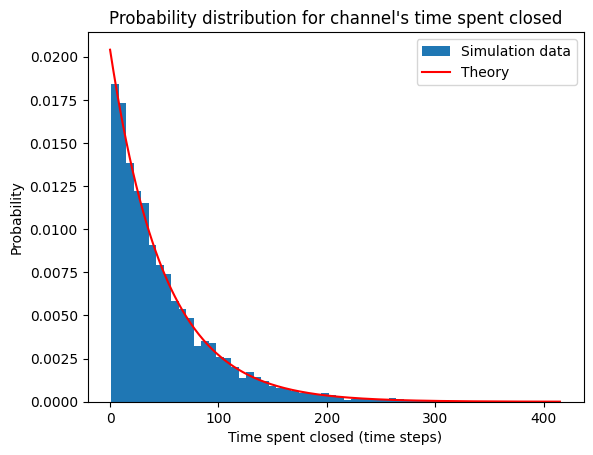

In [27]:
# theoretical function for the probability a channel opens after t time steps
def theory_P(t, k_m):
    return k_m * (1-k_m) ** (t-1)

# defining steps and preallocating array
steps = int(1E6)
exp_closings = int(6.67E4)
close_times = np.zeros(exp_closings)

# defining rate constants
k_p = 0.01
k_m = 0.02

# channel variable
channel = True

# variable used for tracking closing time
t_c = 0

for t in range(steps):
    # random variable used for determining if the channel opens or closes
    r = np.random.random()

    if channel and r <= k_p:
        # begins tracking time
        t_c = t
        # flips channel state
        channel = not channel
    elif not channel and r <= k_m:
        # takes difference from when channel first closed
        t_c = t - t_c
        # flips channel state
        channel = not channel
        # gets index of first 0 in close_times array and replaces it with t_c
        idx = np.argwhere(close_times == 0).min()
        close_times[idx] = t_c

# remove 0s
close_times = close_times[close_times != 0]
# create a time array for the theoretical function
t_arr = np.arange(0, close_times.max())

# plotting
plt.hist(close_times, 60, density=True, label='Simulation data')
plt.plot(t_arr, theory_P(t_arr, k_m), color='red', label='Theory')
plt.xlabel('Time spent closed (time steps)')
plt.ylabel('Probability')
plt.title('Probability distribution for channel\'s time spent closed')
plt.legend()
plt.show()